# Sales Conversion Funnel Analysis: E-commerce Dataset

## Objective

The objective of this project is to analyse the **e-commerce sales funnel** to identify where user drop-offs occur at different stages (view, add to cart, checkout, purchase) and recommend actionable strategies to improve overall conversion rates.

---

## Project Workflow

1. Problem Statement and Business Context
2. Data Understanding
3. Data Cleaning
4. Funnel Drop-off Rate Calculation
5. Funnel Visualisation
6. Root Cause Analysis
7. Business Recommendations


## Step 1: Importing Libraries

We will import essential libraries for data manipulation, visualisation, and analysis.


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Plotting style
sns.set_style("whitegrid")
%matplotlib inline


## Step 2: Loading the Dataset

We will load the e-commerce funnel dataset and display its initial rows for understanding.


In [2]:
# Load datasets from Downloads folder on Mac

orders = pd.read_csv("/Users/aditya/Downloads/olist_orders_dataset.csv")
order_items = pd.read_csv("/Users/aditya/Downloads/olist_order_items_dataset.csv")
payments = pd.read_csv("/Users/aditya/Downloads/olist_order_payments_dataset.csv")
reviews = pd.read_csv("/Users/aditya/Downloads/olist_order_reviews_dataset.csv")

# Display shapes to confirm loading
print("Orders shape:", orders.shape)
print("Order Items shape:", order_items.shape)
print("Payments shape:", payments.shape)
print("Reviews shape:", reviews.shape)


Orders shape: (99441, 8)
Order Items shape: (112650, 7)
Payments shape: (103886, 5)
Reviews shape: (99224, 7)


## Step 3: Data Understanding

We will explore the datasets to understand available features and prepare for funnel stage calculations.


In [3]:
# Display first few rows of each dataset to understand structure

print("Orders Dataset:")
display(orders.head())

print("\nOrder Items Dataset:")
display(order_items.head())

print("\nPayments Dataset:")
display(payments.head())

print("\nReviews Dataset:")
display(reviews.head())


Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Order Items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Payments Dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Reviews Dataset:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Step 4: Funnel Drop-off Rate Calculation

We will define the funnel stages as follows:

1. **Order Created (Viewed)** – Number of unique orders placed
2. **Order Items (Added to Cart)** – Number of unique orders with items
3. **Payment Approved (Checkout Completed)** – Number of unique orders with payments
4. **Delivered (Purchase Success)** – Number of unique orders delivered

Then, we will calculate drop-off rates between these stages.


In [4]:
# Stage 1: Order Created (Viewed)
stage_1 = orders['order_id'].nunique()

# Stage 2: Order Items (Added to Cart)
stage_2 = order_items['order_id'].nunique()

# Stage 3: Payment Approved (Checkout Completed)
stage_3 = payments['order_id'].nunique()

# Stage 4: Delivered (Purchase Success)
delivered_orders = orders[orders['order_status'] == 'delivered']
stage_4 = delivered_orders['order_id'].nunique()

# Compile funnel counts into a dataframe for clarity
funnel_counts = pd.DataFrame({
    'Funnel Stage': ['Order Created', 'Added to Cart', 'Payment Approved', 'Delivered'],
    'Count': [stage_1, stage_2, stage_3, stage_4]
})

funnel_counts


,Funnel Stage,Count
0,Order Created,99441
1,Added to Cart,98666
2,Payment Approved,99440
3,Delivered,96478


In [5]:
# Calculate drop-off rates between stages

funnel_counts['Drop-off Rate (%)'] = funnel_counts['Count'].pct_change(-1) * 100
funnel_counts['Drop-off Rate (%)'] = funnel_counts['Drop-off Rate (%)'].abs().round(2)

funnel_counts


,Funnel Stage,Count,Drop-off Rate (%)
0,Order Created,99441,0.79
1,Added to Cart,98666,0.78
2,Payment Approved,99440,3.07
3,Delivered,96478,NaN


## Step 5: Funnel Visualisation

We will create a horizontal bar chart representing each funnel stage, showing where the highest drop-offs occur.


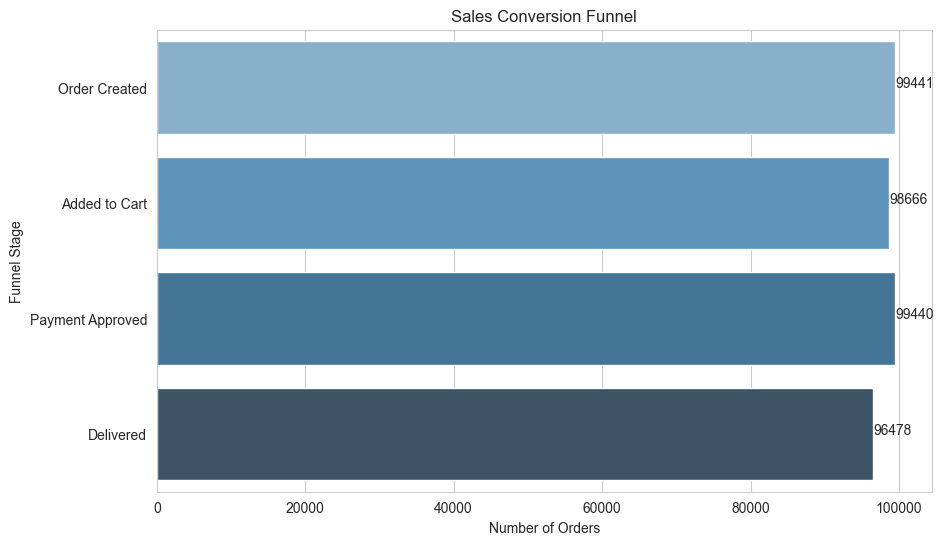

In [6]:
# Plot funnel stages as a horizontal bar chart

plt.figure(figsize=(10,6))
sns.barplot(
    x='Count', 
    y='Funnel Stage', 
    data=funnel_counts, 
    palette='Blues_d'
)

plt.title("Sales Conversion Funnel")
plt.xlabel("Number of Orders")
plt.ylabel("Funnel Stage")

# Annotate bars with counts
for index, value in enumerate(funnel_counts['Count']):
    plt.text(value + 100, index, str(value))

plt.show()


## Step 6: Root Cause Analysis

Based on the funnel data, we will interpret where the largest drop-offs occur and possible reasons behind them.


In [7]:
# Display funnel counts and drop-off rates for reference

funnel_counts



,Funnel Stage,Count,Drop-off Rate (%)
0,Order Created,99441,0.79
1,Added to Cart,98666,0.78
2,Payment Approved,99440,3.07
3,Delivered,96478,NaN
